# Experiment 02: Deformations Experiments ETH-01

In this notebook, we are using the CLUST Dataset.
The sequence used for this notebook is ETH-01.zip


In [3]:
import sys
import random
import os
sys.path.append('../src')
import warnings
warnings.filterwarnings("ignore") 
from PIL import Image
from sklearn.manifold import Isomap
from utils.compute_metrics import get_metrics, get_majority_vote,log_test_metrics
from utils.split import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GroupKFold
from tqdm import tqdm
from pprint import pprint
import torch
from itertools import product
import pickle
import pandas as pd
import numpy as np
import mlflow
import matplotlib.pyplot as plt
#from kymatio.numpy import Scattering2D

import torch
from tqdm import tqdm
from kymatio.torch import Scattering2D


In [5]:
directory1=os.listdir('../data/02_interim/Data1')
directory1.sort()
directory3=os.listdir('../data/02_interim/Data3')
directory3.sort()

# 1. Extract PCA Components

In [29]:
with open('../data/03_features/scattering_features_deformation.pickle', 'rb') as handle:
    scattering_features1= pickle.load(handle)
with open('../data/03_features/dataset_deformation.pickle', 'rb') as handle:
    dataset1 = pickle.load(handle)
with open('../data/03_features/scattering_features_deformation3.pickle', 'rb') as handle:
    scattering_features3= pickle.load(handle)
with open('../data/03_features/dataset_deformation3.pickle', 'rb') as handle:
    dataset3= pickle.load(handle)
with open('../data/03_features/scattering_features_deformation5.pickle', 'rb') as handle:
    scattering_features5= pickle.load(handle)
with open('../data/03_features/dataset_deformation5.pickle', 'rb') as handle:
    dataset5= pickle.load(handle)

## ETH-1 PCA

In [81]:
sc_features1 = scattering_features1.view(scattering_features1.shape[0], scattering_features1.shape[1] * scattering_features1.shape[2] * scattering_features1.shape[3])
X1 = sc_features1.cpu().numpy()
#standardize
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
pca = PCA(n_components=3, kernel ='poly')           
X1 = pca.fit_transform(X1)

TypeError: __init__() got an unexpected keyword argument 'kernel'

In [82]:
sc_features3 = scattering_features3.view(scattering_features3.shape[0], scattering_features3.shape[1] * scattering_features3.shape[2] * scattering_features3.shape[3])
X3 = sc_features3.cpu().numpy()
#standardize
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)
pca = PCA(n_components=3, kernel ='rbf')            
X3 = pca.fit_transform(X3)

TypeError: __init__() got an unexpected keyword argument 'kernel'

In [ ]:
sc_features5 = scattering_features5.view(scattering_features5.shape[0], scattering_features5.shape[1] * scattering_features5.shape[2] * scattering_features5.shape[3])
X5 = sc_features5.cpu().numpy()
#standardize
scaler = StandardScaler()
X5 = scaler.fit_transform(X5)
pca = PCA(n_components=3, kernel ='poly')           
X5 = pca.fit_transform(X5)

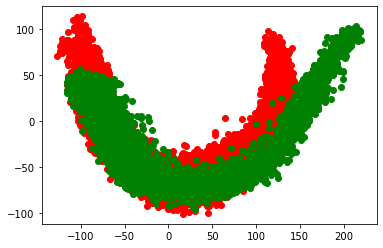

In [45]:
plt.scatter(X3[:,0], X3[:,1], color='red')
plt.scatter(X5[:,0], X5[:,1], color='green')

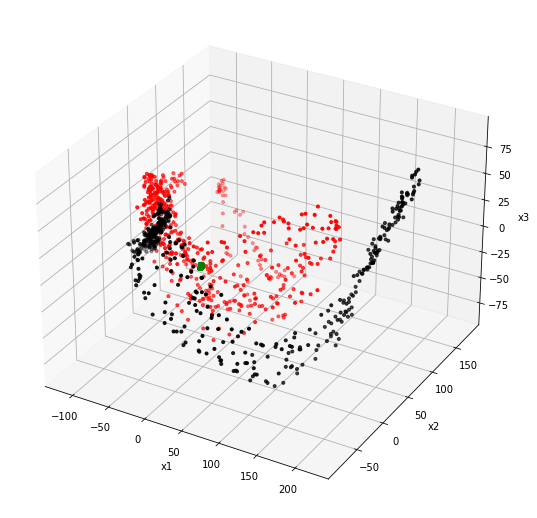

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)

#ax.scatter(X1[:,0][0:500], X1[:,1][0:500], X1[:,2][0:500], s=9,c='red')
# ax.scatter(X3[:,0], X3[:,1], X3[:,2], s=9,c='green')
# ax.scatter(X5[:,0], X5[:,1], X5[:,2], s=9,c='black')
ax.scatter(X3[:,0][0:500], X3[:,1][0:500], X3[:,2][0:500], s=9,c='green')
ax.scatter(X5[:,0][0:500], X5[:,1][0:500], X5[:,2][0:500], s=9,c='black')
# ax.scatter(X_transformed3[:,0], X_transformed3[:,1], X_transformed3[:,2], s=9,color='green')
# ax.scatter(X_transformed5[:,0], X_transformed5[:,1], X_transformed5[:,2], s=9,color='black')
#ax.scatter(X1[:,0][0:500], X1[:,1][1000:1500], X1[:,2][1000:1500], s=9,c='red')
# ax.scatter(X3[:,0][0:500], X3[:,1][1000:1500], X3[:,2][1000:1500], s=9,c='green')
# ax.scatter(X5[:,0][0:500], X5[:,1][1000:1500], X5[:,2][1000:1500], s=9,c='black')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

In [74]:
from sklearn.manifold import LocallyLinearEmbedding
embedding3 = LocallyLinearEmbedding(n_components=3)
X_transformed3 = embedding3.fit_transform(X3[:1000])
embedding5 = LocallyLinearEmbedding(n_components=3)
X_transformed5 = embedding5.fit_transform(X5[:1000])

In [70]:
X_transformed3.shape

(500, 3)

In [82]:
df = pd.DataFrame(X)
df['order'] = dataset['order']
#df.corr()

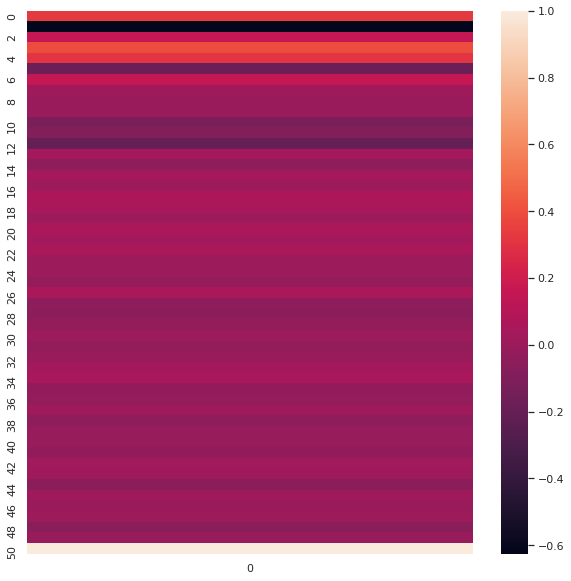

In [163]:
import seaborn as sns; sns.set_theme()
figure(figsize = (10,10))
vec1 = df.corr()['order'].values
vec2 = vec1.reshape(vec1.shape[0], 1)
sns.heatmap(vec2)
plt.show()

In [11]:
def visualize_corr_pca_order(pca_c, df):
    plt.figure(figsize=(16,8))
    x= df['order']
    y= df[pca_c]
    plt.scatter(x,y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red')
    plt.ylabel('PCA Component '+ str(pca_c+1))
    plt.xlabel('Frame Order')
    plt.show()

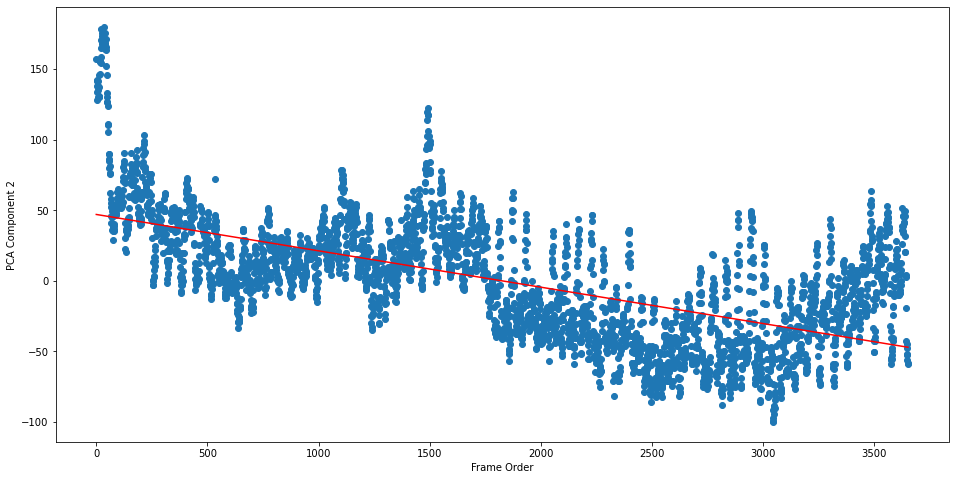

Correlation between order and Pca component 2: -0.6273984933299187


In [100]:
visualize_corr_pca_order(1, df)
print('Correlation between order and Pca component 2:', df.corr()['order'][1])

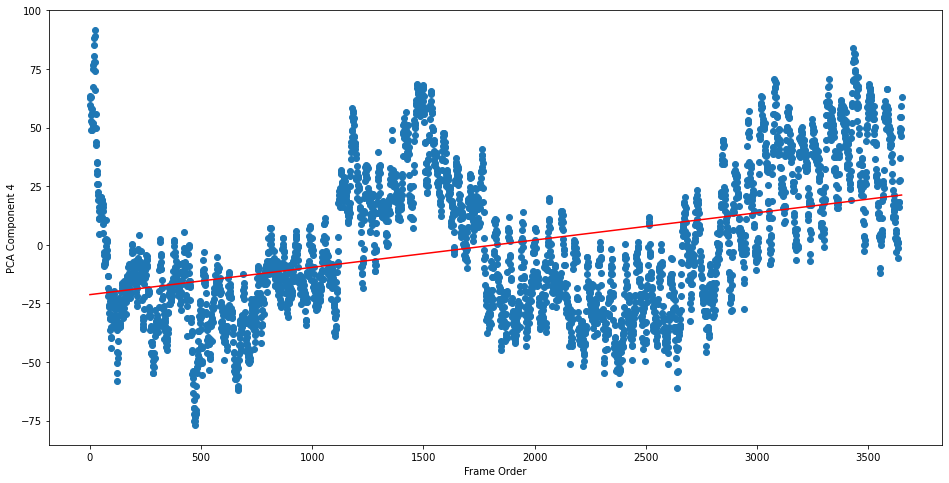

Correlation between order and Pca component 3: 0.3959953154361853


In [102]:
visualize_corr_pca_order(3, df)
print('Correlation between order and Pca component 3:', df.corr()['order'][3])

In [10]:
def visualize_sub_plot(pca_c, df,  x_num= 3, y_num =3):
    fig, axs = plt.subplots(x_num, y_num, figsize=(15,10))
    size = len(df)
    plot_num = x_num * y_num
    frame = int(size/plot_num)
    start = 0
    for i in range (x_num):
        for j in range (y_num):     
            final = start + frame
            x= df['order'].iloc[start:final]
            y= df[pca_c].iloc[start:final]
            m, b = np.polyfit(x, y, 1)

            axs[i, j].set_ylabel('PCA Component '+ str(pca_c+1))
            axs[i, j].set_xlabel('Frame Order')
            axs[i, j].plot(x, m*x + b, color='red')
            axs[i, j].scatter(x,y)
            start = start + frame
    plt.show()


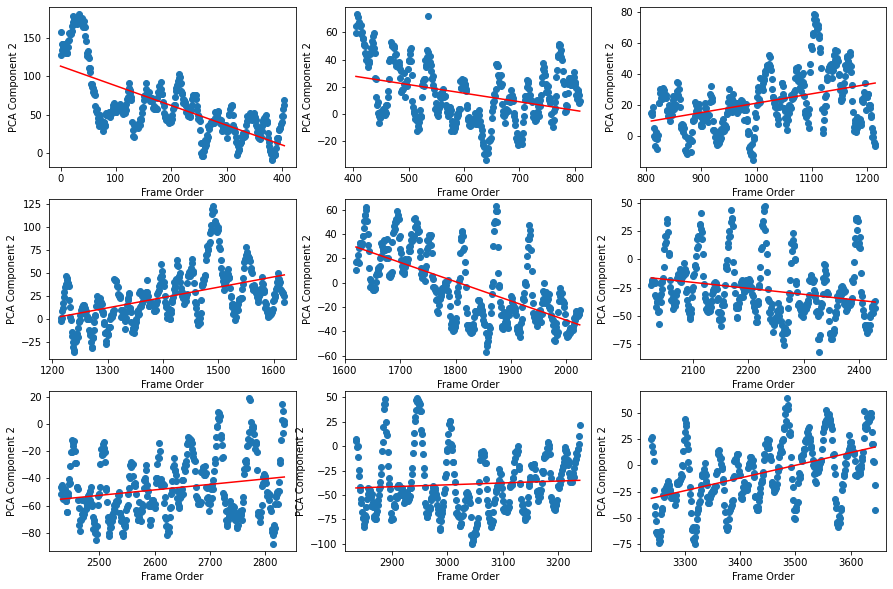

In [145]:
visualize_sub_plot(1, df,  x_num= 3, y_num =3)

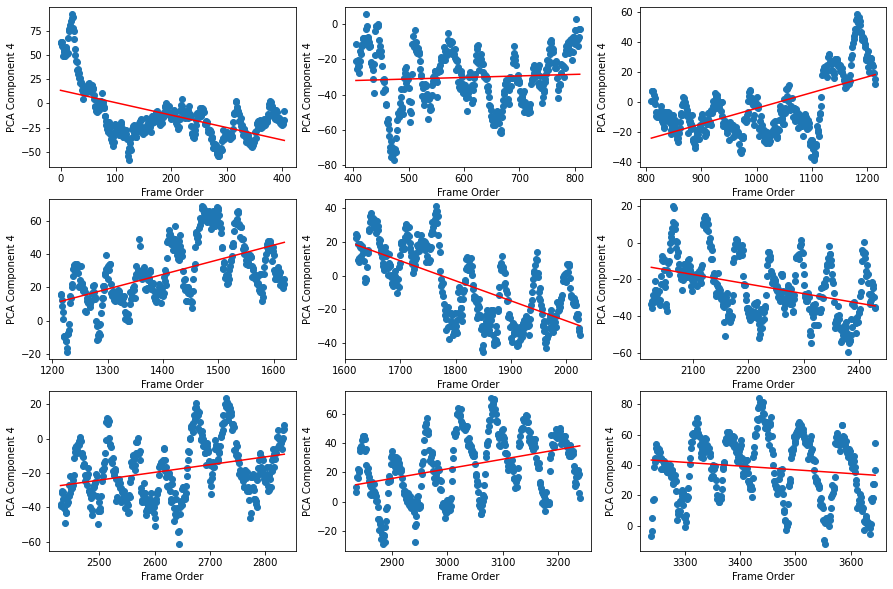

In [146]:
visualize_sub_plot(3, df,  x_num= 3, y_num =3)

# 5. Isometric Mapping Correlation with Order

In [2]:
with open('../data/03_features/scattering_features_deformation.pickle', 'rb') as handle:
    scattering_features = pickle.load(handle)
with open('../data/03_features/dataset_deformation.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
sc_features = scattering_features.view(scattering_features.shape[0], scattering_features.shape[1] * scattering_features.shape[2] * scattering_features.shape[3])
X = sc_features.cpu().numpy()
#standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[0:500])
df = pd.DataFrame(X_transformed)
df['order'] = dataset['order']

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.corr()

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,order
0,1.000000e+00,2.501072e-16,-0.985816
1,2.501072e-16,1.000000e+00,-0.109032
order,-9.858159e-01,-1.090317e-01,1.000000


In [6]:
from sklearn.manifold import Isomap
def visualize_sub_plot_iso(pca_c, x_num= 3, y_num =3):
    fig, axs = plt.subplots(x_num, y_num, figsize=(15,13))
    size =len(sc_features )
    plot_num = x_num * y_num
    frame = int(size/plot_num)
    start = 0
    x_total = []
    for i in tqdm(range (x_num)):
        for j in tqdm(range (y_num)):     
            final = start + frame
            embedding = Isomap(n_components=2)
            X_transformed = embedding.fit_transform(X[start:final])
            x_total.extend(X_transformed)
            df = pd.DataFrame(X_transformed)
            df['order'] = dataset['order'].iloc[start:final].values
            x= df['order']
            y= df[pca_c]
            start = start + frame
            
            #m, b = np.polyfit(x, y, 1)

            axs[i, j].set_ylabel('Iso Map Dimension '+ str(pca_c+1))
            axs[i, j].set_xlabel('Frame Order')
            #axs[i, j].plot(x, m*x + b, color='red')
            axs[i, j].scatter(x,y)            
    plt.show()
    return x_total

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 3/3 [01:32<00:00, 30.71s/it]


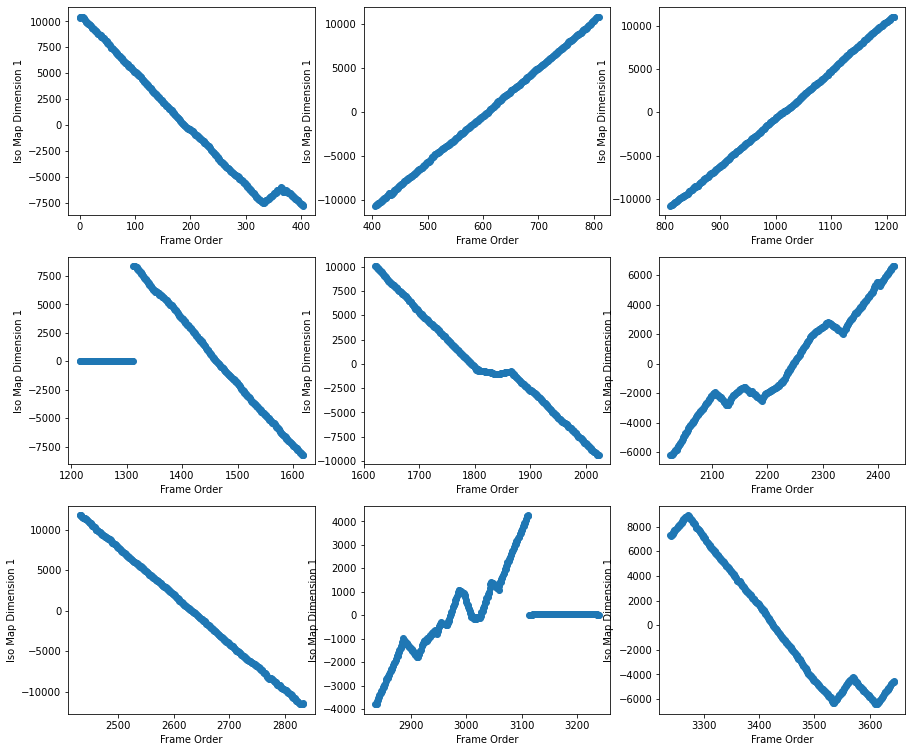

In [7]:
x_total = visualize_sub_plot_iso(0, x_num= 3, y_num =3)
#print('Correlation between order and Pca component 2:', df.corr()['order'][1])